
Computing best approximate linear coefficients...
Best approximate coefficients: [-0.00089069  0.61223732  0.56551739]

Running Monte Carlo simulations for Non-Linear DGP...
Processing sample size n = 50


100%|██████████| 1000/1000 [00:25<00:00, 39.39it/s]


Performing 5-fold cross-validation for n = 50...
Optimal lambda from CV: 497.702356
Processing sample size n = 100


100%|██████████| 1000/1000 [00:26<00:00, 38.42it/s]


Performing 5-fold cross-validation for n = 100...
Optimal lambda from CV: 61.359073
Processing sample size n = 200


100%|██████████| 1000/1000 [00:28<00:00, 35.56it/s]


Performing 5-fold cross-validation for n = 200...
Optimal lambda from CV: 53.366992
Processing sample size n = 500


100%|██████████| 1000/1000 [00:27<00:00, 36.52it/s]


Performing 5-fold cross-validation for n = 500...
Optimal lambda from CV: 123.284674
Processing sample size n = 1000


100%|██████████| 1000/1000 [00:28<00:00, 35.40it/s]


Performing 5-fold cross-validation for n = 1000...
Optimal lambda from CV: 93.260335
Processing sample size n = 5000


100%|██████████| 1000/1000 [01:01<00:00, 16.22it/s]


Performing 5-fold cross-validation for n = 5000...
Optimal lambda from CV: 40.370173
Processing sample size n = 10000


100%|██████████| 1000/1000 [01:05<00:00, 15.27it/s]


Performing 5-fold cross-validation for n = 10000...
Optimal lambda from CV: 61.359073

Analysis of results:

Summary of Results:
Best approximate coefficients:
β0 = -0.000891
β1 = 0.612237
β2 = 0.565517

Coefficient convergence:
n = 50: β0 = -0.021040 β1 = 0.589188 β2 = 0.563602
n = 100: β0 = 0.025403 β1 = 0.617711 β2 = 0.565365
n = 200: β0 = -0.006719 β1 = 0.610965 β2 = 0.551373
n = 500: β0 = -0.003625 β1 = 0.600104 β2 = 0.569996
n = 1000: β0 = 0.010792 β1 = 0.609697 β2 = 0.568131
n = 5000: β0 = 0.003835 β1 = 0.605018 β2 = 0.568107
n = 10000: β0 = -0.001522 β1 = 0.606605 β2 = 0.565298

MSE comparison:
n = 50:
  OLS MSE: 9.832993
  Ridge MSE (CV λ = 497.702356): 9.418121
  Improvement: 4.22%
n = 100:
  OLS MSE: 9.337245
  Ridge MSE (CV λ = 61.359073): 9.129065
  Improvement: 2.23%
n = 200:
  OLS MSE: 9.076011
  Ridge MSE (CV λ = 53.366992): 9.017981
  Improvement: 0.64%
n = 500:
  OLS MSE: 8.935740
  Ridge MSE (CV λ = 123.284674): 8.928313
  Improvement: 0.08%
n = 1000:
  OLS MSE: 8.88

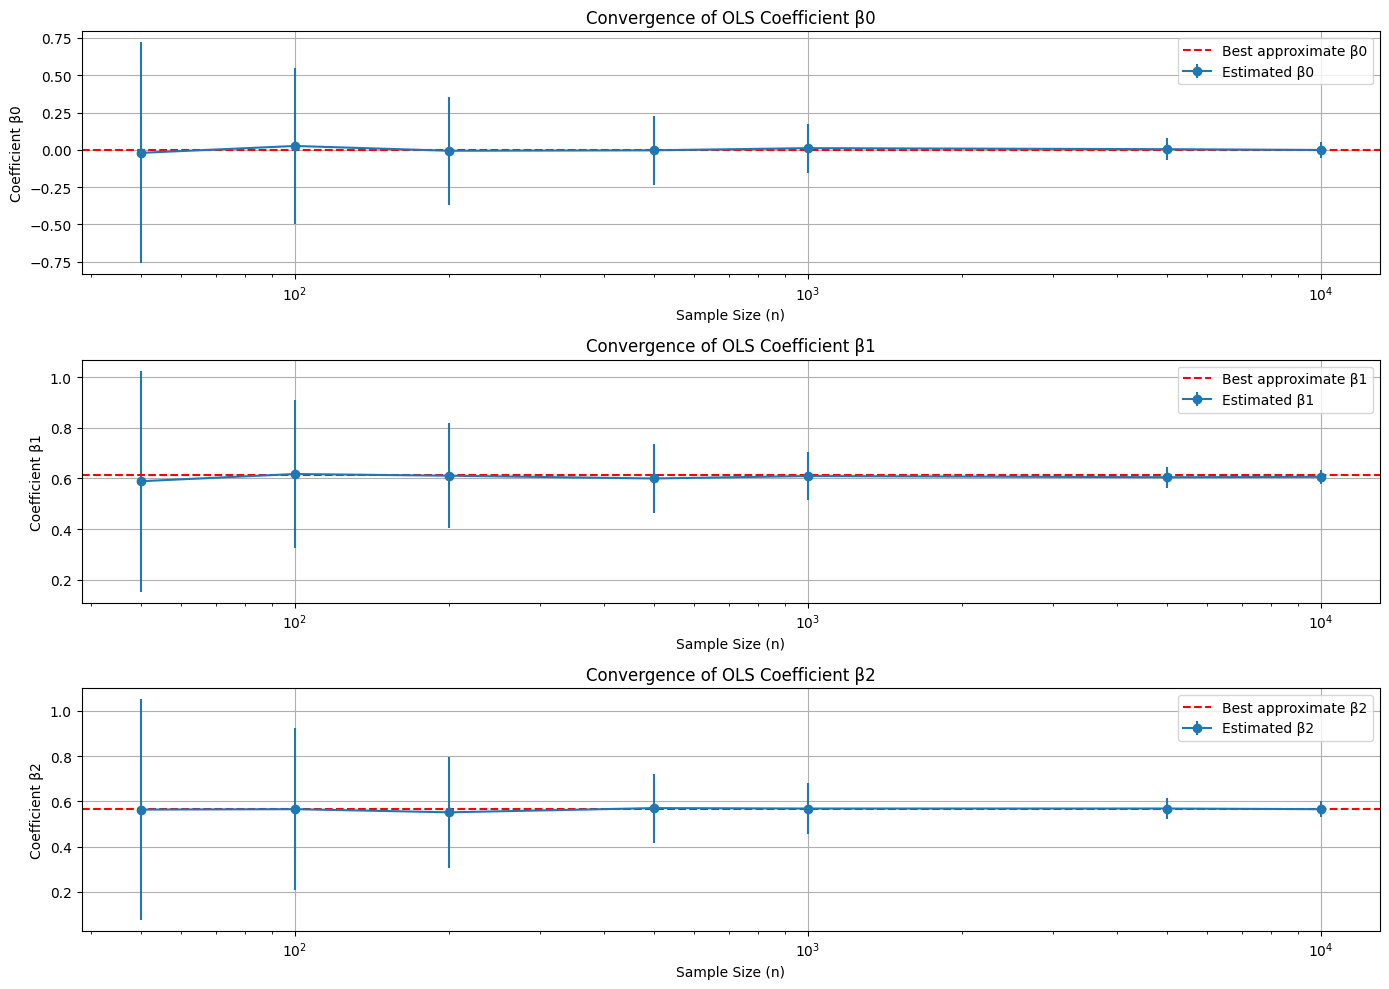

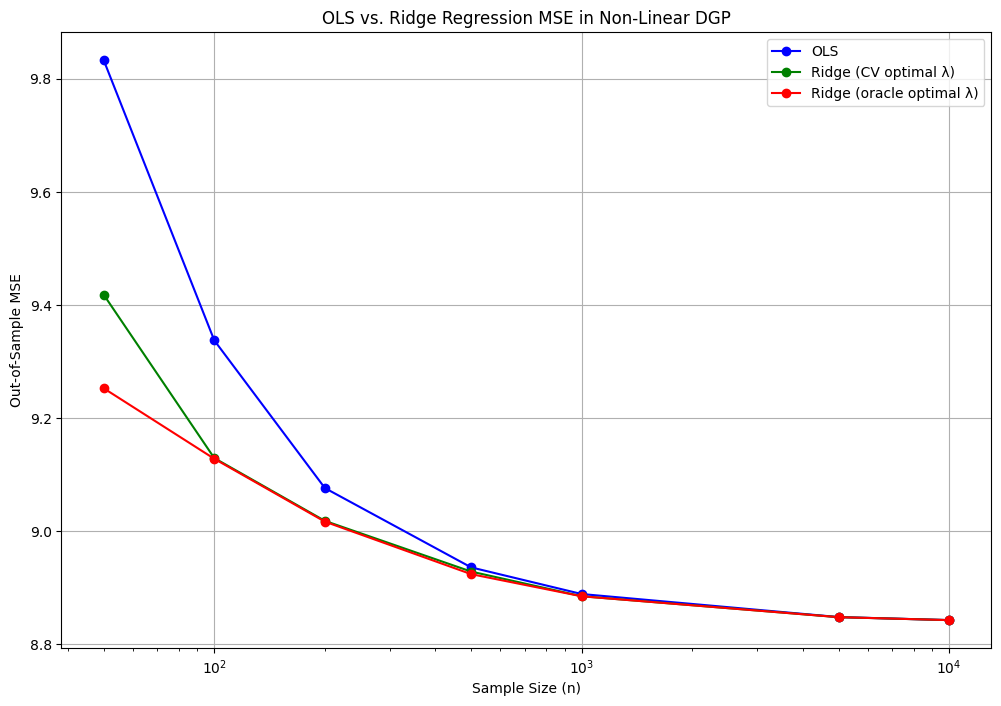

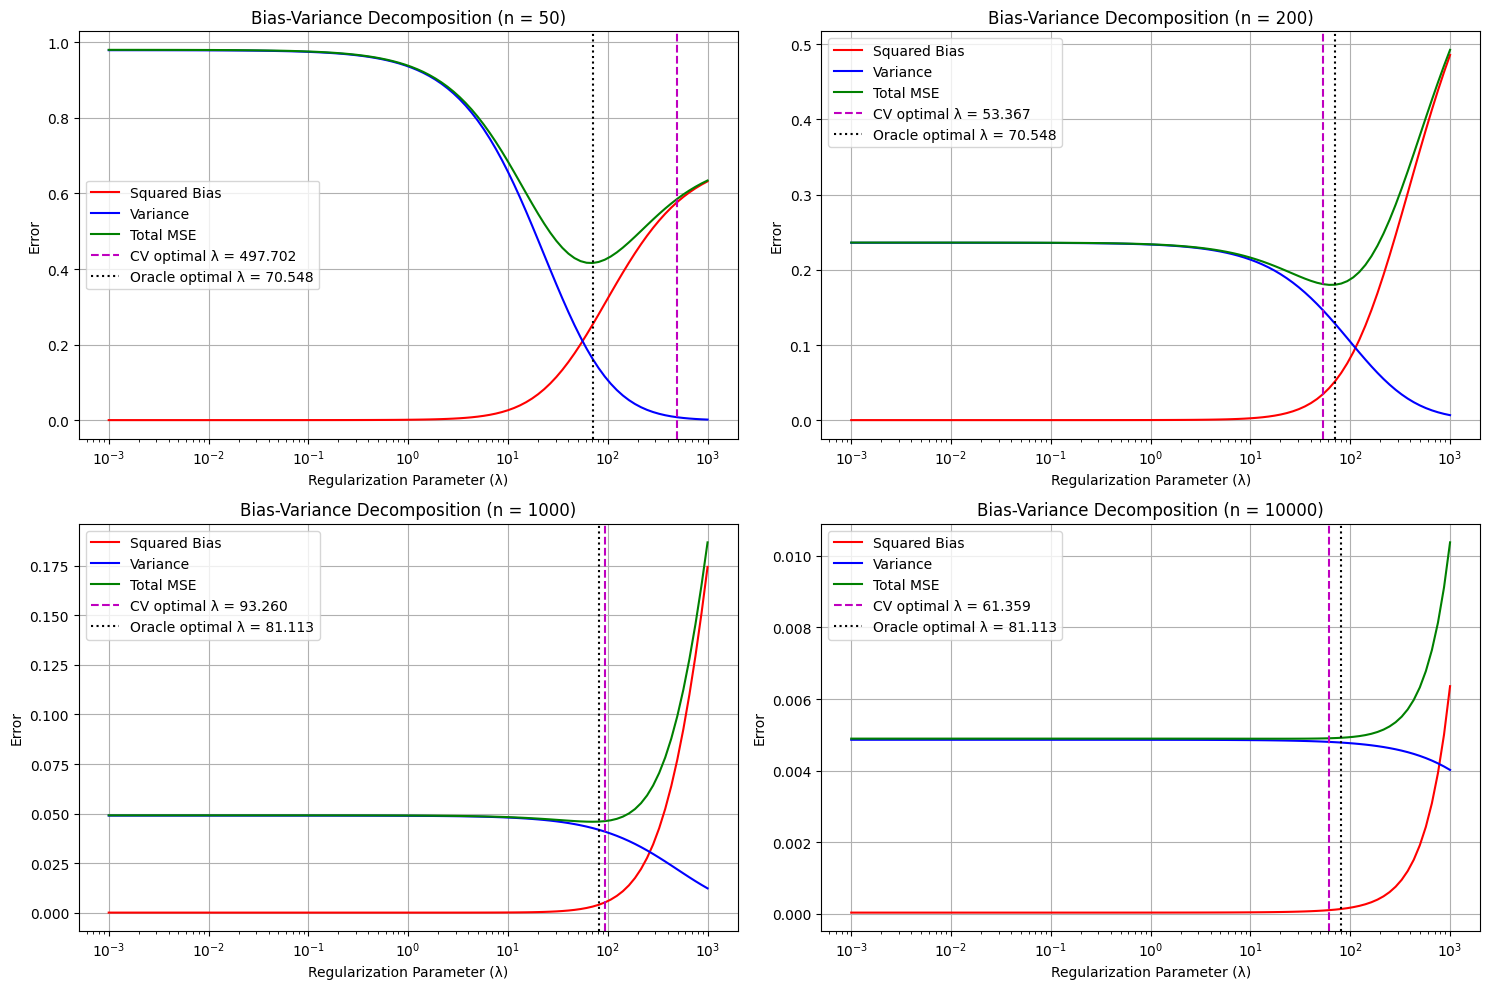

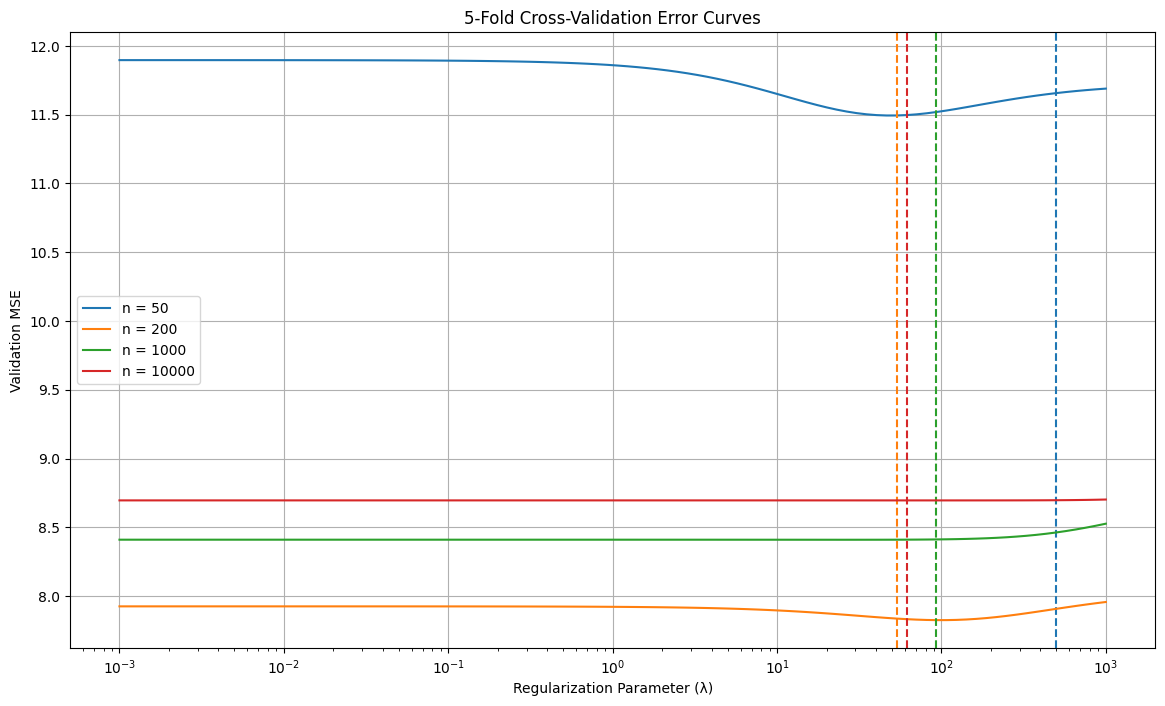

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set random seed for reproducibility
np.random.seed(42)

# Hand implementation of OLS
def ols_estimator(X, y):
    """
    Ordinary Least Squares estimator.
    
    Args:
        X: Feature matrix of shape (n, p)
        y: Target vector of shape (n,)
    
    Returns:
        beta_hat: OLS coefficient estimates
    """
    # Calculate (X'X)^(-1)X'y
    XtX = X.T @ X
    XtX_inv = np.linalg.inv(XtX)
    Xty = X.T @ y
    beta_hat = XtX_inv @ Xty
    
    return beta_hat

# Hand implementation of Ridge Regression
def ridge_estimator(X, y, lambda_):
    """
    Ridge Regression estimator.
    
    Args:
        X: Feature matrix of shape (n, p)
        y: Target vector of shape (n,)
        lambda_: Regularization parameter
    
    Returns:
        beta_hat: Ridge coefficient estimates
    """
    n, p = X.shape
    # Calculate (X'X + λI)^(-1)X'y
    XtX = X.T @ X
    I = np.eye(p)
    XtX_ridge = XtX + lambda_ * I
    XtX_ridge_inv = np.linalg.inv(XtX_ridge)
    Xty = X.T @ y
    beta_hat = XtX_ridge_inv @ Xty
    
    return beta_hat

# Function to generate data from a non-linear DGP
def generate_nonlinear_data(n, p=3, sigma=1.0):
    """
    Generate data from a non-linear Data Generating Process.
    
    Args:
        n: Number of samples
        p: Number of features
        sigma: Standard deviation of the error term
    
    Returns:
        X: Feature matrix of shape (n, p)
        y: Target vector of shape (n,)
    """
    # Generate X from standard normal distribution
    X = np.random.normal(0, 1, size=(n, p))
    
    # Generate non-linear function: 
    # f(X) = X₁² + sin(X₂) + X₁X₃ + exp(X₃/2)
    f_X = X[:, 0]**2 + np.sin(X[:, 1]) + X[:, 0] * X[:, 2] + np.exp(X[:, 2] / 2)
    
    # Add noise
    epsilon = np.random.normal(0, sigma, size=n)
    y = f_X + epsilon
    
    return X, y

# Function to calculate mean squared error
def mean_squared_error(y_true, y_pred):
    """Calculate the mean squared error between true and predicted values."""
    return np.mean((y_true - y_pred) ** 2)

# Implement k-fold cross-validation
def k_fold_cross_validation(X, y, k=5, lambda_values=None):
    """
    Implement k-fold cross-validation for Ridge Regression.
    
    Args:
        X: Feature matrix
        y: Target vector
        k: Number of folds
        lambda_values: List of regularization parameters to try
    
    Returns:
        cv_errors: Mean validation error for each lambda value
    """
    n = len(y)
    fold_size = n // k
    
    if lambda_values is None:
        lambda_values = [0.01, 0.1, 1.0, 10.0, 100.0]
    
    cv_errors = np.zeros(len(lambda_values))
    
    # Generate fold indices
    indices = np.arange(n)
    np.random.shuffle(indices)
    
    for fold in range(k):
        # Create validation set
        val_indices = indices[fold * fold_size:(fold + 1) * fold_size]
        train_indices = np.concatenate([indices[:fold * fold_size], indices[(fold + 1) * fold_size:]])
        
        X_train, y_train = X[train_indices], y[train_indices]
        X_val, y_val = X[val_indices], y[val_indices]
        
        # Evaluate each lambda value
        for i, lambda_ in enumerate(lambda_values):
            beta_ridge = ridge_estimator(X_train, y_train, lambda_)
            y_val_pred = X_val @ beta_ridge
            
            # Accumulate validation error
            cv_errors[i] += mean_squared_error(y_val, y_val_pred) / k
    
    return cv_errors

# Main function for non-linear DGP simulation
def nonlinear_dgp_simulation():
    # Parameters
    p = 3  # Number of features
    sigma = 1.0  # Noise standard deviation
    num_simulations = 1000  # Number of Monte Carlo simulations
    sample_sizes = [50, 100, 200, 500, 1000, 5000, 10000]  # Different sample sizes
    lambdas = np.logspace(-3, 3, 100)  # Ridge regularization parameters
    
    # Results containers
    ols_betas_all = {}
    ridge_betas_all = {}
    ols_in_sample_mse = {}
    ols_out_sample_mse = {}
    ridge_in_sample_mse = {}
    ridge_out_sample_mse = {}
    cv_optimal_lambdas = {}
    
    # Generate a very large dataset to compute the "best approximate" linear coefficients
    print("\nComputing best approximate linear coefficients...")
    X_large, y_large = generate_nonlinear_data(100000, p, sigma)
    best_beta = ols_estimator(X_large, y_large)
    print(f"Best approximate coefficients: {best_beta}")
    
    # Large test set for out-of-sample evaluation
    X_test_large, y_test_large = generate_nonlinear_data(10000, p, sigma)
    
    print("\nRunning Monte Carlo simulations for Non-Linear DGP...")
    
    # For each sample size
    for n in sample_sizes:
        print(f"Processing sample size n = {n}")
        
        # Initialize containers for this sample size
        ols_betas = np.zeros((num_simulations, p))
        ridge_betas = {lam: np.zeros((num_simulations, p)) for lam in lambdas}
        
        ols_in_mse = np.zeros(num_simulations)
        ols_out_mse = np.zeros(num_simulations)
        ridge_in_mse = {lam: np.zeros(num_simulations) for lam in lambdas}
        ridge_out_mse = {lam: np.zeros(num_simulations) for lam in lambdas}
        
        # Run Monte Carlo simulations
        for sim in tqdm(range(num_simulations)):
            # Generate training data
            X_train, y_train = generate_nonlinear_data(n, p, sigma)
            
            # Fit OLS
            beta_hat_ols = ols_estimator(X_train, y_train)
            ols_betas[sim] = beta_hat_ols
            
            # Compute in-sample and out-of-sample MSE for OLS
            y_train_pred_ols = X_train @ beta_hat_ols
            y_test_pred_ols = X_test_large @ beta_hat_ols
            ols_in_mse[sim] = mean_squared_error(y_train, y_train_pred_ols)
            ols_out_mse[sim] = mean_squared_error(y_test_large, y_test_pred_ols)
            
            # Fit Ridge for different lambda values
            for lam in lambdas:
                beta_hat_ridge = ridge_estimator(X_train, y_train, lam)
                ridge_betas[lam][sim] = beta_hat_ridge
                
                # Compute in-sample and out-of-sample MSE for Ridge
                y_train_pred_ridge = X_train @ beta_hat_ridge
                y_test_pred_ridge = X_test_large @ beta_hat_ridge
                ridge_in_mse[lam][sim] = mean_squared_error(y_train, y_train_pred_ridge)
                ridge_out_mse[lam][sim] = mean_squared_error(y_test_large, y_test_pred_ridge)
        
        # Store results for this sample size
        ols_betas_all[n] = ols_betas
        ridge_betas_all[n] = ridge_betas
        ols_in_sample_mse[n] = ols_in_mse
        ols_out_sample_mse[n] = ols_out_mse
        ridge_in_sample_mse[n] = ridge_in_mse
        ridge_out_sample_mse[n] = ridge_out_mse
        
        # Perform cross-validation to find optimal lambda for this sample size
        print(f"Performing 5-fold cross-validation for n = {n}...")
        X_cv, y_cv = generate_nonlinear_data(n, p, sigma)
        cv_errors = k_fold_cross_validation(X_cv, y_cv, k=5, lambda_values=lambdas)
        optimal_lambda_idx = np.argmin(cv_errors)
        optimal_lambda = lambdas[optimal_lambda_idx]
        cv_optimal_lambdas[n] = optimal_lambda
        print(f"Optimal lambda from CV: {optimal_lambda:.6f}")
    
    # Analysis and plotting
    print("\nAnalysis of results:")
    
    # 1. Show that OLS coefficients converge to the best approximate coefficients
    plt.figure(figsize=(14, 10))
    for j in range(p):
        plt.subplot(p, 1, j+1)
        
        # Plot distribution of OLS coefficient estimates for different sample sizes
        estimated_betas = [np.mean(ols_betas_all[n][:, j]) for n in sample_sizes]
        estimated_std = [np.std(ols_betas_all[n][:, j]) for n in sample_sizes]
        
        plt.errorbar(sample_sizes, estimated_betas, yerr=estimated_std, marker='o', linestyle='-', 
                   label=f'Estimated β{j}')
        plt.axhline(y=best_beta[j], color='r', linestyle='--', label=f'Best approximate β{j}')
        
        plt.xscale('log')
        plt.title(f'Convergence of OLS Coefficient β{j}')
        plt.xlabel('Sample Size (n)')
        plt.ylabel(f'Coefficient β{j}')
        plt.grid(True)
        plt.legend()
    
    plt.tight_layout()
    plt.savefig('nonlinear_dgp_ols_convergence.png')
    
    # 2. Compare MSE of OLS vs. Ridge with optimal lambda from CV
    plt.figure(figsize=(12, 8))
    
    # OLS out-of-sample MSE by sample size
    ols_out_mse_mean = [np.mean(ols_out_sample_mse[n]) for n in sample_sizes]
    
    # Ridge out-of-sample MSE with optimal lambda by sample size
    ridge_optimal_mse = []
    oracle_optimal_mse = []
    oracle_lambdas = []
    
    for n in sample_sizes:
        # CV-optimal lambda MSE
        ridge_optimal_mse.append(np.mean(ridge_out_sample_mse[n][cv_optimal_lambdas[n]]))
        
        # Find the "oracle" optimal lambda (best possible lambda using test data)
        mean_ridge_out_mse = [np.mean(ridge_out_sample_mse[n][lam]) for lam in lambdas]
        best_idx = np.argmin(mean_ridge_out_mse)
        oracle_lambdas.append(lambdas[best_idx])
        oracle_optimal_mse.append(mean_ridge_out_mse[best_idx])
    
    # Plot results
    plt.plot(sample_sizes, ols_out_mse_mean, 'bo-', label='OLS')
    plt.plot(sample_sizes, ridge_optimal_mse, 'go-', label='Ridge (CV optimal λ)')
    plt.plot(sample_sizes, oracle_optimal_mse, 'ro-', label='Ridge (oracle optimal λ)')
    
    plt.xscale('log')
    plt.title('OLS vs. Ridge Regression MSE in Non-Linear DGP')
    plt.xlabel('Sample Size (n)')
    plt.ylabel('Out-of-Sample MSE')
    plt.grid(True)
    plt.legend()
    plt.savefig('nonlinear_dgp_ols_vs_ridge_mse.png')
    
    # 3. Bias-Variance decomposition for different sample sizes
    plt.figure(figsize=(15, 10))
    
    sample_indices = [0, 2, 4, 6]  # Select a few sample sizes to show
    for i, idx in enumerate(sample_indices):
        n = sample_sizes[idx]
        plt.subplot(2, 2, i+1)
        
        # Calculate bias^2 for each lambda (compared to best approximate beta)
        bias_squared = np.zeros(len(lambdas))
        variance = np.zeros(len(lambdas))
        
        for j, lam in enumerate(lambdas):
            # Bias: difference between mean estimate and best approximate
            mean_estimate = np.mean(ridge_betas_all[n][lam], axis=0)
            bias = mean_estimate - best_beta
            bias_squared[j] = np.sum(bias**2)
            
            # Variance: trace of the covariance matrix of estimates
            variance[j] = np.sum(np.var(ridge_betas_all[n][lam], axis=0))
        
        # Total MSE = bias^2 + variance
        total_mse = bias_squared + variance
        
        # Plot components
        plt.semilogx(lambdas, bias_squared, 'r-', label='Squared Bias')
        plt.semilogx(lambdas, variance, 'b-', label='Variance')
        plt.semilogx(lambdas, total_mse, 'g-', label='Total MSE')
        
        # Mark CV-optimal lambda
        plt.axvline(x=cv_optimal_lambdas[n], color='m', linestyle='--', label=f'CV optimal λ = {cv_optimal_lambdas[n]:.3f}')
        
        # Mark oracle optimal lambda
        plt.axvline(x=oracle_lambdas[idx], color='k', linestyle=':', label=f'Oracle optimal λ = {oracle_lambdas[idx]:.3f}')
        
        plt.title(f'Bias-Variance Decomposition (n = {n})')
        plt.xlabel('Regularization Parameter (λ)')
        plt.ylabel('Error')
        plt.grid(True)
        plt.legend()
    
    plt.tight_layout()
    plt.savefig('nonlinear_dgp_bias_variance_decomposition.png')
    
    # 4. Plot CV error curves for different sample sizes
    plt.figure(figsize=(14, 8))
    
    sample_indices = [0, 2, 4, 6]  # Select a few sample sizes to show
    for i, idx in enumerate(sample_indices):
        n = sample_sizes[idx]
        X_cv, y_cv = generate_nonlinear_data(n, p, sigma)
        cv_errors = k_fold_cross_validation(X_cv, y_cv, k=5, lambda_values=lambdas)
        
        plt.semilogx(lambdas, cv_errors, label=f'n = {n}')
        plt.axvline(x=cv_optimal_lambdas[n], linestyle='--', color=f'C{i}')
    
    plt.title('5-Fold Cross-Validation Error Curves')
    plt.xlabel('Regularization Parameter (λ)')
    plt.ylabel('Validation MSE')
    plt.grid(True)
    plt.legend()
    plt.savefig('nonlinear_dgp_cv_curves.png')
    
    # Print summary of results
    print("\nSummary of Results:")
    print("Best approximate coefficients:")
    for j in range(p):
        print(f"β{j} = {best_beta[j]:.6f}")
    
    print("\nCoefficient convergence:")
    for n in sample_sizes:
        mean_ols_beta = np.mean(ols_betas_all[n], axis=0)
        print(f"n = {n}: " + " ".join([f"β{j} = {mean_ols_beta[j]:.6f}" for j in range(p)]))
    
    print("\nMSE comparison:")
    for n in sample_sizes:
        print(f"n = {n}:")
        print(f"  OLS MSE: {np.mean(ols_out_sample_mse[n]):.6f}")
        
        # CV-optimal lambda MSE
        cv_lambda = cv_optimal_lambdas[n]
        cv_mse = np.mean(ridge_out_sample_mse[n][cv_lambda])
        print(f"  Ridge MSE (CV λ = {cv_lambda:.6f}): {cv_mse:.6f}")
        
        # Improvement percentage
        improvement = (np.mean(ols_out_sample_mse[n]) - cv_mse) / np.mean(ols_out_sample_mse[n]) * 100
        print(f"  Improvement: {improvement:.2f}%")
    
    # Return results for further analysis
    return {
        'best_beta': best_beta,
        'ols_betas': {n: np.mean(ols_betas_all[n], axis=0) for n in sample_sizes},
        'ols_mse': {n: np.mean(ols_out_sample_mse[n]) for n in sample_sizes},
        'ridge_mse': {n: np.mean(ridge_out_sample_mse[n][cv_optimal_lambdas[n]]) for n in sample_sizes},
        'cv_optimal_lambdas': cv_optimal_lambdas,
        'oracle_optimal_lambdas': dict(zip(sample_sizes, oracle_lambdas))
    }

if __name__ == "__main__":
    results = nonlinear_dgp_simulation()
    print("\nSimulation complete. Check the generated plots for visualizations.")